## Plot Ripple Duration and Ripple Rate

This file does the following
1. Load in ripple epoch data.
2. Plot ripple duration for each individual day. Note: when plotting, data is limited by durations under 300ms because I assumed ripples candidates detected longer than this are mistakes.
3. Plot ripple duration for joint sessions disruption vs. control
4. Calculate ripple rates for each individual day
5. Plot ripple rates for joint sessions disruption vs. control

In [18]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import nelpy as nel
import nelpy.plotting as npl
import jagular as jag
import ghostipy as gsp
from numpy.fft import fft
warnings.simplefilter("ignore", UserWarning)
import logging
import logging.config
logging.basicConfig(level=logging.ERROR) 
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

rec_list = ['preFamSleep', 'postTestSleep']


## Load Data

In [2]:
# prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day3/'
# prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day4/'
# prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day5/'

rec_list = ['preFamSleep', 'postTestSleep']
disruption = []
control = []

prefix = 'Disruption_Day1/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
disruption.append(ripple_epochs)

prefix = 'Disruption_Day3/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
disruption.append(ripple_epochs)

print("Disruption ------")
print(disruption)

prefix = 'Control_Day4/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
control.append(ripple_epochs)

prefix = 'Control_Day5/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
control.append(ripple_epochs)

print("\nControl ----- ")
print(control)


Disruption ------
[{'preFamSleep': <EpochArray at 0x7ff7d98209b0: 315 epochs> of length 34.073 seconds, 'postTestSleep': <EpochArray at 0x7ff7d9820b70: 274 epochs> of length 34.164 seconds}, {'preFamSleep': <EpochArray at 0x7ff7d9820828: 351 epochs> of length 36.174 seconds, 'postTestSleep': <EpochArray at 0x7ff7d9820d30: 265 epochs> of length 25.589 seconds}]

Control ----- 
[{'preFamSleep': <EpochArray at 0x7ff7d9820f98: 330 epochs> of length 35.3004 seconds, 'postTestSleep': <EpochArray at 0x7ff7d97d1cf8: 342 epochs> of length 38.8967999999999999 seconds}, {'preFamSleep': <EpochArray at 0x7ff7d97d1940: 166 epochs> of length 19.2852 seconds, 'postTestSleep': <EpochArray at 0x7ff7d97d1f28: 249 epochs> of length 28.49110000000000004 seconds}]


In [3]:
day1_pfs = disruption[0][rec_list[0]].lengths*1000
day1_pts = disruption[0][rec_list[1]].lengths*1000

day3_pfs = disruption[1][rec_list[0]].lengths*1000
day3_pts = disruption[1][rec_list[1]].lengths*1000

day4_pfs = control[0][rec_list[0]].lengths*1000
day4_pts = control[0][rec_list[1]].lengths*1000

day5_pfs = control[1][rec_list[0]].lengths*1000
day5_pts = control[1][rec_list[1]].lengths*1000

## Plot Ripple Duration (each day)

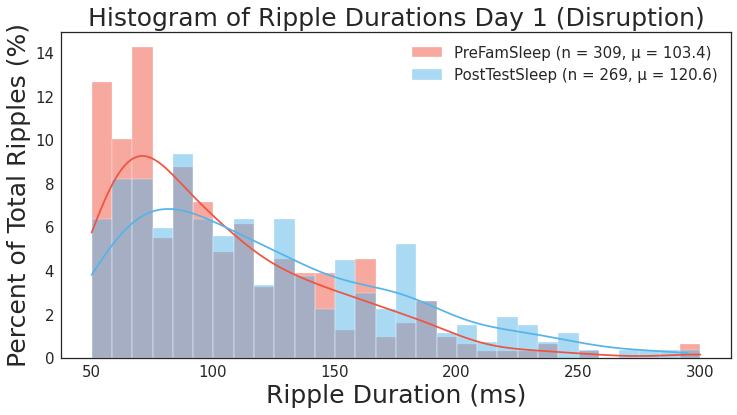

p-value =  0.0


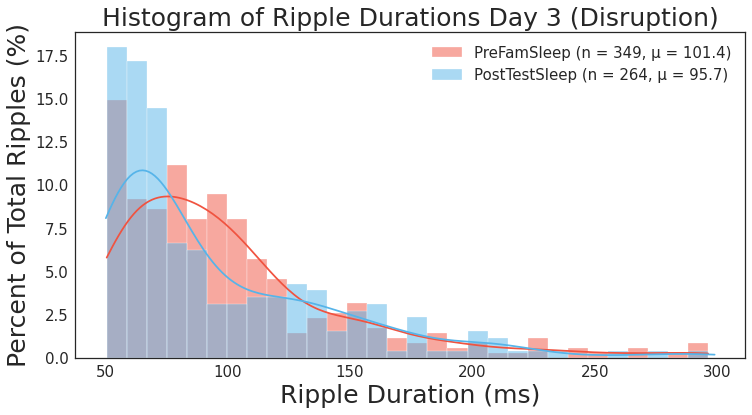

p-value =  0.005


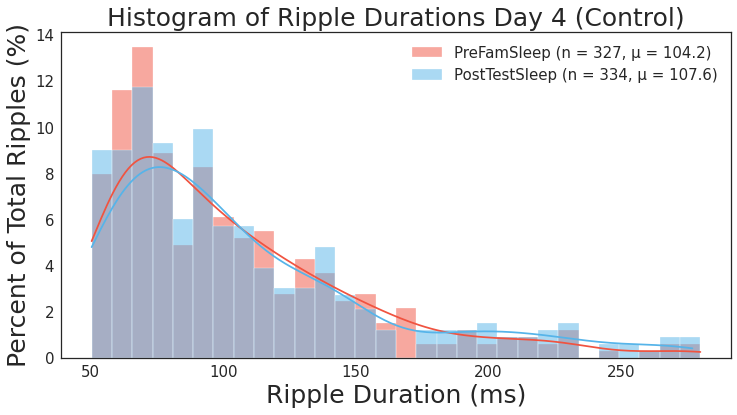

p-value =  0.319


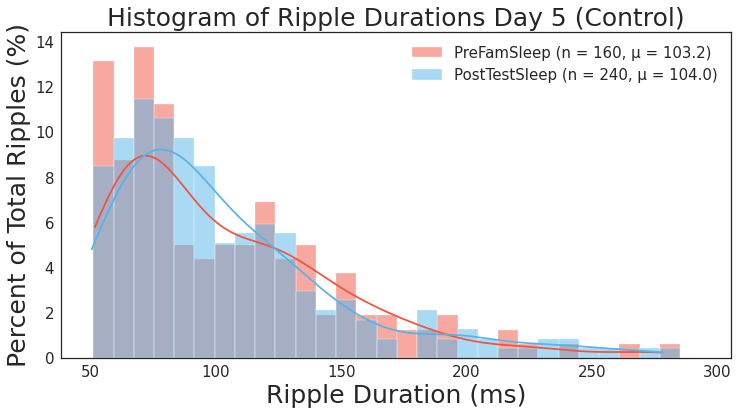

p-value =  0.375


In [7]:
# save_path = change here

# Day 1 ---------
day = "Day 1 (Disruption)"
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

limit = np.where(day1_pfs < 300)
bins = np.histogram_bin_edges(day1_pfs[limit], bins=30)
data = day1_pfs[limit]
mu = ", μ = " + str(round(np.mean(data), 1)) + ")"
sns.histplot(data, bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep (n = "+str(len(data)) + mu)

limit = np.where(day1_pts < 300)
data2 = day1_pts[limit]
mu = ", μ = " + str(round(np.mean(data2), 1)) + ")"
sns.histplot(data2, bins=bins, color=npl.colors.sweet.blue, edgecolor='w', kde=True, stat = "percent", label="PostTestSleep (n = "+str(len(data2)) + mu)

ax.set_title("Histogram of Ripple Durations " + day)
ax.set_xlabel("Ripple Duration (ms)")
ax.set_ylabel("Percent of Total Ripples (%)")
plt.legend()
# plt.savefig(save_path + 'day1.png')
plt.show()
pvalue = mannwhitneyu(data,data2).pvalue
print("p-value = ", round(pvalue,3))

# Day 3 ---------
day = "Day 3 (Disruption)"
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

limit = np.where(day3_pfs < 300)
bins = np.histogram_bin_edges(day3_pfs[limit], bins=30)
data = day3_pfs[limit]
mu = ", μ = " + str(round(np.mean(data), 1)) + ")"
sns.histplot(data, bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep (n = "+str(len(data)) + mu)

limit = np.where(day3_pts < 300)
data2 = day3_pts[limit]
mu = ", μ = " + str(round(np.mean(data2), 1)) + ")"
sns.histplot(data2, bins=bins, color=npl.colors.sweet.blue, edgecolor='w', kde=True, stat = "percent", label="PostTestSleep (n = "+str(len(data2)) + mu)

ax.set_title("Histogram of Ripple Durations " + day)
ax.set_xlabel("Ripple Duration (ms)")
ax.set_ylabel("Percent of Total Ripples (%)")
plt.legend()
# plt.savefig(save_path + 'day3.png')
plt.show()
pvalue = mannwhitneyu(data,data2).pvalue
print("p-value = ", round(pvalue,3))

# Day 4 ---------
day = "Day 4 (Control)"
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

limit = np.where(day4_pfs < 300)
bins = np.histogram_bin_edges(day4_pfs[limit], bins=30)
data = day4_pfs[limit]
mu = ", μ = " + str(round(np.mean(data), 1)) + ")"
sns.histplot(day4_pfs[limit], bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep (n = "+str(len(data)) + mu)

limit = np.where(day4_pts < 300)
data2 = day4_pts[limit]
mu = ", μ = " + str(round(np.mean(data2), 1)) + ")"
sns.histplot(day4_pts[limit], bins=bins, color=npl.colors.sweet.blue, edgecolor='w', kde=True, stat = "percent", label="PostTestSleep (n = "+str(len(data2)) + mu)

ax.set_title("Histogram of Ripple Durations " + day)
ax.set_xlabel("Ripple Duration (ms)")
ax.set_ylabel("Percent of Total Ripples (%)")
plt.legend()
# plt.savefig(save_path + 'day4.png')
plt.show()
pvalue = mannwhitneyu(data,data2).pvalue
print("p-value = ", round(pvalue,3))

# Day 5 ---------
day = "Day 5 (Control)"
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

limit = np.where(day5_pfs < 300)
bins = np.histogram_bin_edges(day3_pfs[limit], bins=30)
data = day5_pfs[limit]
mu = ", μ = " + str(round(np.mean(data), 1)) + ")"
sns.histplot(day5_pfs[limit], bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep (n = "+str(len(data)) + mu)

limit = np.where(day5_pts < 300)
data2 = day5_pts[limit]
mu = ", μ = " + str(round(np.mean(data2), 1)) + ")"
sns.histplot(day5_pts[limit], bins=bins, color=npl.colors.sweet.blue, edgecolor='w', kde=True, stat = "percent", label="PostTestSleep (n = "+str(len(data2)) + mu)

ax.set_title("Histogram of Ripple Durations " + day)
ax.set_xlabel("Ripple Duration (ms)")
ax.set_ylabel("Percent of Total Ripples (%)")
plt.legend()
# plt.savefig(save_path + 'day5.png')
plt.show()
pvalue = mannwhitneyu(data,data2).pvalue
print("p-value = ", round(pvalue,3))

## Plot Joint Data for Durations and P-Value

p-value for disruption  (limit < 300) =  0.11050676551889832


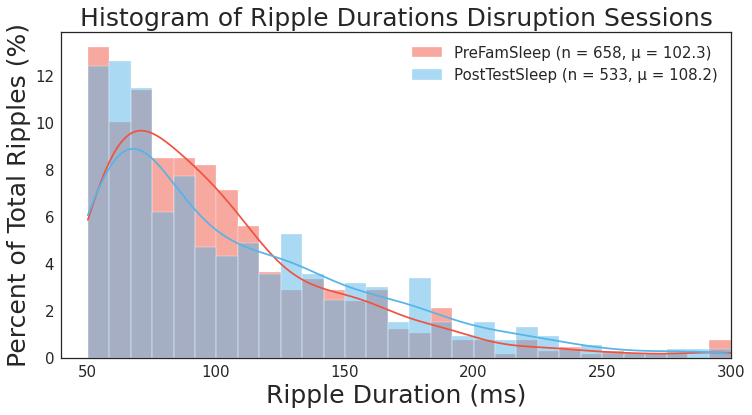

p-value for disruption  (limit < 300) =  0.29020292936173697


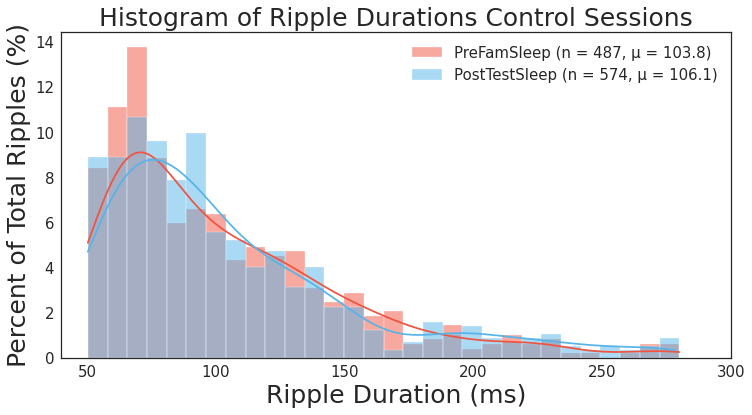

In [14]:
# Plotting Ripple Durations Joint Across Sessions
# Limit by Ripples < 300ms, because detected ripples longer
# than this may be errors

save_path = "/home/kaylavokt/Desktop/Whrath/figs/duration_"
disruption_data_pfs = np.concatenate((day1_pfs,day3_pfs), axis=None)
disruption_data_pts = np.concatenate((day1_pts,day3_pts), axis=None)
# d_pvalue = ttest_ind(disruption_data_pfs, disruption_data_pts).pvalue
d_pvalue = mannwhitneyu(disruption_data_pfs, disruption_data_pts).pvalue

# print("mean disruption_data_pfs = ", np.mean(disruption_data_pfs))
# print("mean disruption_data_pts = ", np.mean(disruption_data_pts))
# print("p-value for disruption = ", d_pvalue)

day = "Disruption Sessions"
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

limit = np.where(disruption_data_pfs < 300)
# print("mean (limit < 300) disruption_data_pfs = ", np.mean(disruption_data_pfs[limit]))
mu = ", μ = " + str(round(np.mean(disruption_data_pfs[limit]), 1)) + ")"
bins = np.histogram_bin_edges(disruption_data_pfs[limit], bins=30)
sns.histplot(disruption_data_pfs[limit], bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep (n = "+str(len(disruption_data_pfs[limit])) + mu)

limit2 = np.where(disruption_data_pts < 300)
# print("mean (limit < 300) disruption_data_pts = ", np.mean(disruption_data_pts[limit2]))
mu = ", μ = " + str(round(np.mean(disruption_data_pts[limit2]), 1)) + ")"
sns.histplot(disruption_data_pts[limit2], bins=bins, color=npl.colors.sweet.blue, edgecolor='w', kde=True, stat = "percent", label="PostTestSleep (n = "+str(len(disruption_data_pts[limit2])) + mu)

d_pvalue = mannwhitneyu(disruption_data_pfs[limit], disruption_data_pts[limit2]).pvalue
# d_pvalue = ttest_ind(disruption_data_pfs[limit], disruption_data_pts[limit2]).pvalue
print("p-value for disruption  (limit < 300ms) = ", d_pvalue)

ax.set_title("Histogram of Ripple Durations " + day)
ax.set_xlabel("Ripple Duration (ms)")
ax.set_ylabel("Percent of Total Ripples (%)")
ax.set_xlim(40,300)
plt.legend()
# plt.savefig(save_path + 'disruption_sessions_mu.png')
plt.show()


# control_data_pfs = np.concatenate((day4_pfs,day5_pfs), axis=None)
# control_data_pts = np.concatenate((day4_pts,day5_pts), axis=None)
# # c_pvalue = ttest_ind(control_data_pfs, control_data_pts).pvalue
# c_pvalue = mannwhitneyu(control_data_pfs, control_data_pts).pvalue

# print("mean control_data_pfs = ", np.mean(control_data_pfs))
# print("mean control_data_pts = ", np.mean(control_data_pts))
# print("p-value for control = ", c_pvalue)

day = "Control Sessions"
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

limit = np.where(control_data_pfs < 300)
# print("mean (limit < 300) control_data_pfs = ", np.mean(control_data_pfs[limit]))
mu = ", μ = " + str(round(np.mean(control_data_pfs[limit]), 1)) + ")"
bins = np.histogram_bin_edges(control_data_pfs[limit], bins=30)
sns.histplot(control_data_pfs[limit], bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep (n = "+str(len(control_data_pfs[limit])) + mu)

limit2 = np.where(control_data_pts < 300)
# print("mean control_data_pts (limit < 300) = ", np.mean(control_data_pts[limit2]))
mu = ", μ = " + str(round(np.mean(control_data_pts[limit2]), 1)) + ")"
sns.histplot(control_data_pts[limit2], bins=bins, color=npl.colors.sweet.blue, edgecolor='w', kde=True, stat = "percent", label="PostTestSleep (n = "+str(len(control_data_pts[limit2])) + mu)

c_pvalue = mannwhitneyu(control_data_pfs[limit], control_data_pts[limit2]).pvalue
# c_pvalue = ttest_ind(control_data_pfs[limit], control_data_pts[limit2]).pvalue
print("p-value for disruption  (limit < 300ms) = ", c_pvalue)

ax.set_title("Histogram of Ripple Durations " + day)
ax.set_xlabel("Ripple Duration (ms)")
ax.set_ylabel("Percent of Total Ripples (%)")
ax.set_xlim(40,300)
plt.legend()
# plt.savefig(save_path + 'control_sessions_mu.png')
plt.show()



## Calculate Ripple Rates and Plot and P-Value (joint sessions)

In [15]:
rec_list = ['preFamSleep', 'postTestSleep']
disruption = []
control = []

prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day1/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
disruption.append(ripple_epochs)

prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day3/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
disruption.append(ripple_epochs)

print("Disruption ------")

prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day4/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
control.append(ripple_epochs)

prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day5/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
control.append(ripple_epochs)

print("\nControl ----- ")
    
num_ripples = []
num_ripples.append(len(disruption[0][rec_list[0]].lengths))
num_ripples.append(len(disruption[0][rec_list[1]].lengths))

num_ripples.append(len(disruption[1][rec_list[0]].lengths))
num_ripples.append(len(disruption[1][rec_list[1]].lengths))

num_ripples.append(len(control[0][rec_list[0]].lengths))
num_ripples.append(len(control[0][rec_list[1]].lengths))

num_ripples.append(len(control[1][rec_list[0]].lengths))
num_ripples.append(len(control[1][rec_list[1]].lengths))

print("Num Ripples", num_ripples)
    
    
rec_list = ['preFamSleep', 'postTestSleep']
disruption = []
control = []

prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day1/'
path = prefix + 'denoised_epochs.npy'
time_dur = np.load(path, allow_pickle=True).item()
disruption.append(time_dur)

prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day3/'
path = prefix + 'denoised_epochs.npy'
time_dur = np.load(path, allow_pickle=True).item()
disruption.append(time_dur)

print("Disruption ------")

prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day4/'
path = prefix + 'denoised_epochs.npy'
time_dur = np.load(path, allow_pickle=True).item()
control.append(time_dur)

prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day5/'
path = prefix + 'denoised_epochs.npy'
time_dur = np.load(path, allow_pickle=True).item()
control.append(time_dur)

print("\nControl ----- ")
time_durations = []
time_durations.append(np.sum(np.diff(disruption[0][rec_list[0]].support.data, axis=1)))
time_durations.append(np.sum(np.diff(disruption[0][rec_list[1]].support.data, axis=1)))
time_durations.append(np.sum(np.diff(disruption[1][rec_list[0]].support.data, axis=1)))
time_durations.append(np.sum(np.diff(disruption[1][rec_list[1]].support.data, axis=1)))
time_durations.append(np.sum(np.diff(control[0][rec_list[0]].support.data, axis=1)))
time_durations.append(np.sum(np.diff(control[0][rec_list[1]].support.data, axis=1)))
time_durations.append(np.sum(np.diff(control[1][rec_list[0]].support.data, axis=1)))
time_durations.append(np.sum(np.diff(control[1][rec_list[1]].support.data, axis=1)))
    
    
print("Time Durations", time_durations)
    
ripple_rates = np.array(num_ripples)/np.array(time_durations)*60
# day1_pfs, day1_pts, day3_pfs, day3_pts, day4_pfs, day4_pts, day5_pfs, day5_pts

print(ripple_rates)

Disruption ------

Control ----- 
Num Ripples [315, 274, 351, 265, 330, 342, 166, 249]
Disruption ------

Control ----- 
Time Durations [1226.9803333333334, 1235.2357666666667, 1198.065, 1201.3120666666666, 1194.7880333333333, 1241.2985666666664, 1191.6400333333333, 1236.9873999999998]
[15.40366988 13.30920011 17.57834508 13.23552842 16.57197716 16.53107524
  8.35822876 12.07773014]


In [20]:
import pandas as pd

df = pd.DataFrame({'Variable': ['Disruption', 'Disruption', 'Disruption', 'Disruption', 'Control', 'Control', 'Control', 'Control'],
                   'Session': ['preFamSleep', 'postTestSleep', 'preFamSleep', 'postTestSleep','preFamSleep', 'postTestSleep', 'preFamSleep', 'postTestSleep'],
                   'Rate': ripple_rates})
print(df)


     Variable        Session       Rate
0  Disruption    preFamSleep  15.403670
1  Disruption  postTestSleep  13.309200
2  Disruption    preFamSleep  17.578345
3  Disruption  postTestSleep  13.235528
4     Control    preFamSleep  16.571977
5     Control  postTestSleep  16.531075
6     Control    preFamSleep   8.358229
7     Control  postTestSleep  12.077730


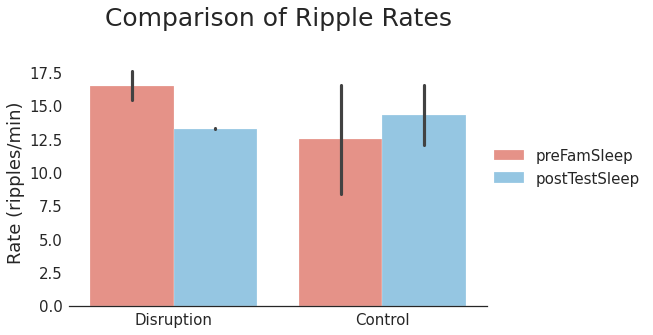

In [21]:
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 18, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))
g = sns.catplot(x='Variable', y='Rate', kind='bar',hue='Session', edgecolor='w', data=df, palette=[npl.colors.sweet.red,npl.colors.sweet.blue], alpha=.7) 
g.despine(left=True)
g.set_axis_labels("", "Rate (ripples/min)")
g.legend.set_title("")
plt.title("Comparison of Ripple Rates\n")
sns.move_legend(g, "center left", bbox_to_anchor=(0.95, .5))
plt.tight_layout()
save_path = "/home/kaylavokt/Desktop/Whrath/figs"
plt.savefig(save_path + '/ripple_rates.png', bbox_inches="tight")
plt.show()

In [17]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

# Disruption
f1 = df[df["Variable"] == 'Disruption']
d_pfs = f1[df["Session"] == 'preFamSleep']
d_pts = f1[df["Session"] == 'postTestSleep']

# d_pvalue = ttest_ind(d_pfs["Rate"], d_pts["Rate"]).pvalue
d_pvalue = mannwhitneyu(d_pfs["Rate"], d_pts["Rate"]).pvalue
print("Disruption p-value = ", d_pvalue)

# Control
f1 = df[df["Variable"] == 'Control']
c_pfs = f1[df["Session"] == 'preFamSleep']
c_pts = f1[df["Session"] == 'postTestSleep']

# c_pvalue = ttest_ind(c_pfs["Rate"], c_pts["Rate"]).pvalue
c_pvalue = mannwhitneyu(c_pfs["Rate"], c_pts["Rate"]).pvalue
print("Control p-value = ", c_pvalue)


Disruption p-value =  0.1226390584033864
Control p-value =  0.34926767915166934
